In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn import tree
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from IPython.display import SVG
from graphviz import Source
from sklearn.model_selection import train_test_split
data=pd.read_csv("general_data.csv")
data.head()
data.dropna()
data.drop_duplicates()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [2]:
labelencoder=preprocessing.LabelEncoder()
data["Attrition"]=labelencoder.fit_transform(data["Attrition"])
data["BusinessTravel"]=labelencoder.fit_transform(data["BusinessTravel"])
data["Gender"]=labelencoder.fit_transform(data["Gender"])
data["Department"]=labelencoder.fit_transform(data["Department"])
data["EducationField"]=labelencoder.fit_transform(data["EducationField"])
data["MaritalStatus"]=labelencoder.fit_transform(data["MaritalStatus"])
data["EducationField"]=labelencoder.fit_transform(data["EducationField"])
data["JobRole"]=labelencoder.fit_transform(data["JobRole"])
data["Over18"]=labelencoder.fit_transform(data["Over18"])
data.head()
data.describe()
data.corr()
data.columns
data.info()
data1=data.drop(["TotalWorkingYears"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int32  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   int32  
 12  MaritalStatus            4410 non-null   int32  
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [3]:
data1.isnull().sum()
data1["NumCompaniesWorked"].mean()
data1["NumCompaniesWorked"]=np.where(data1["NumCompaniesWorked"].isnull(),2,data1["NumCompaniesWorked"])
data1["NumCompaniesWorked"].isnull().sum()

0

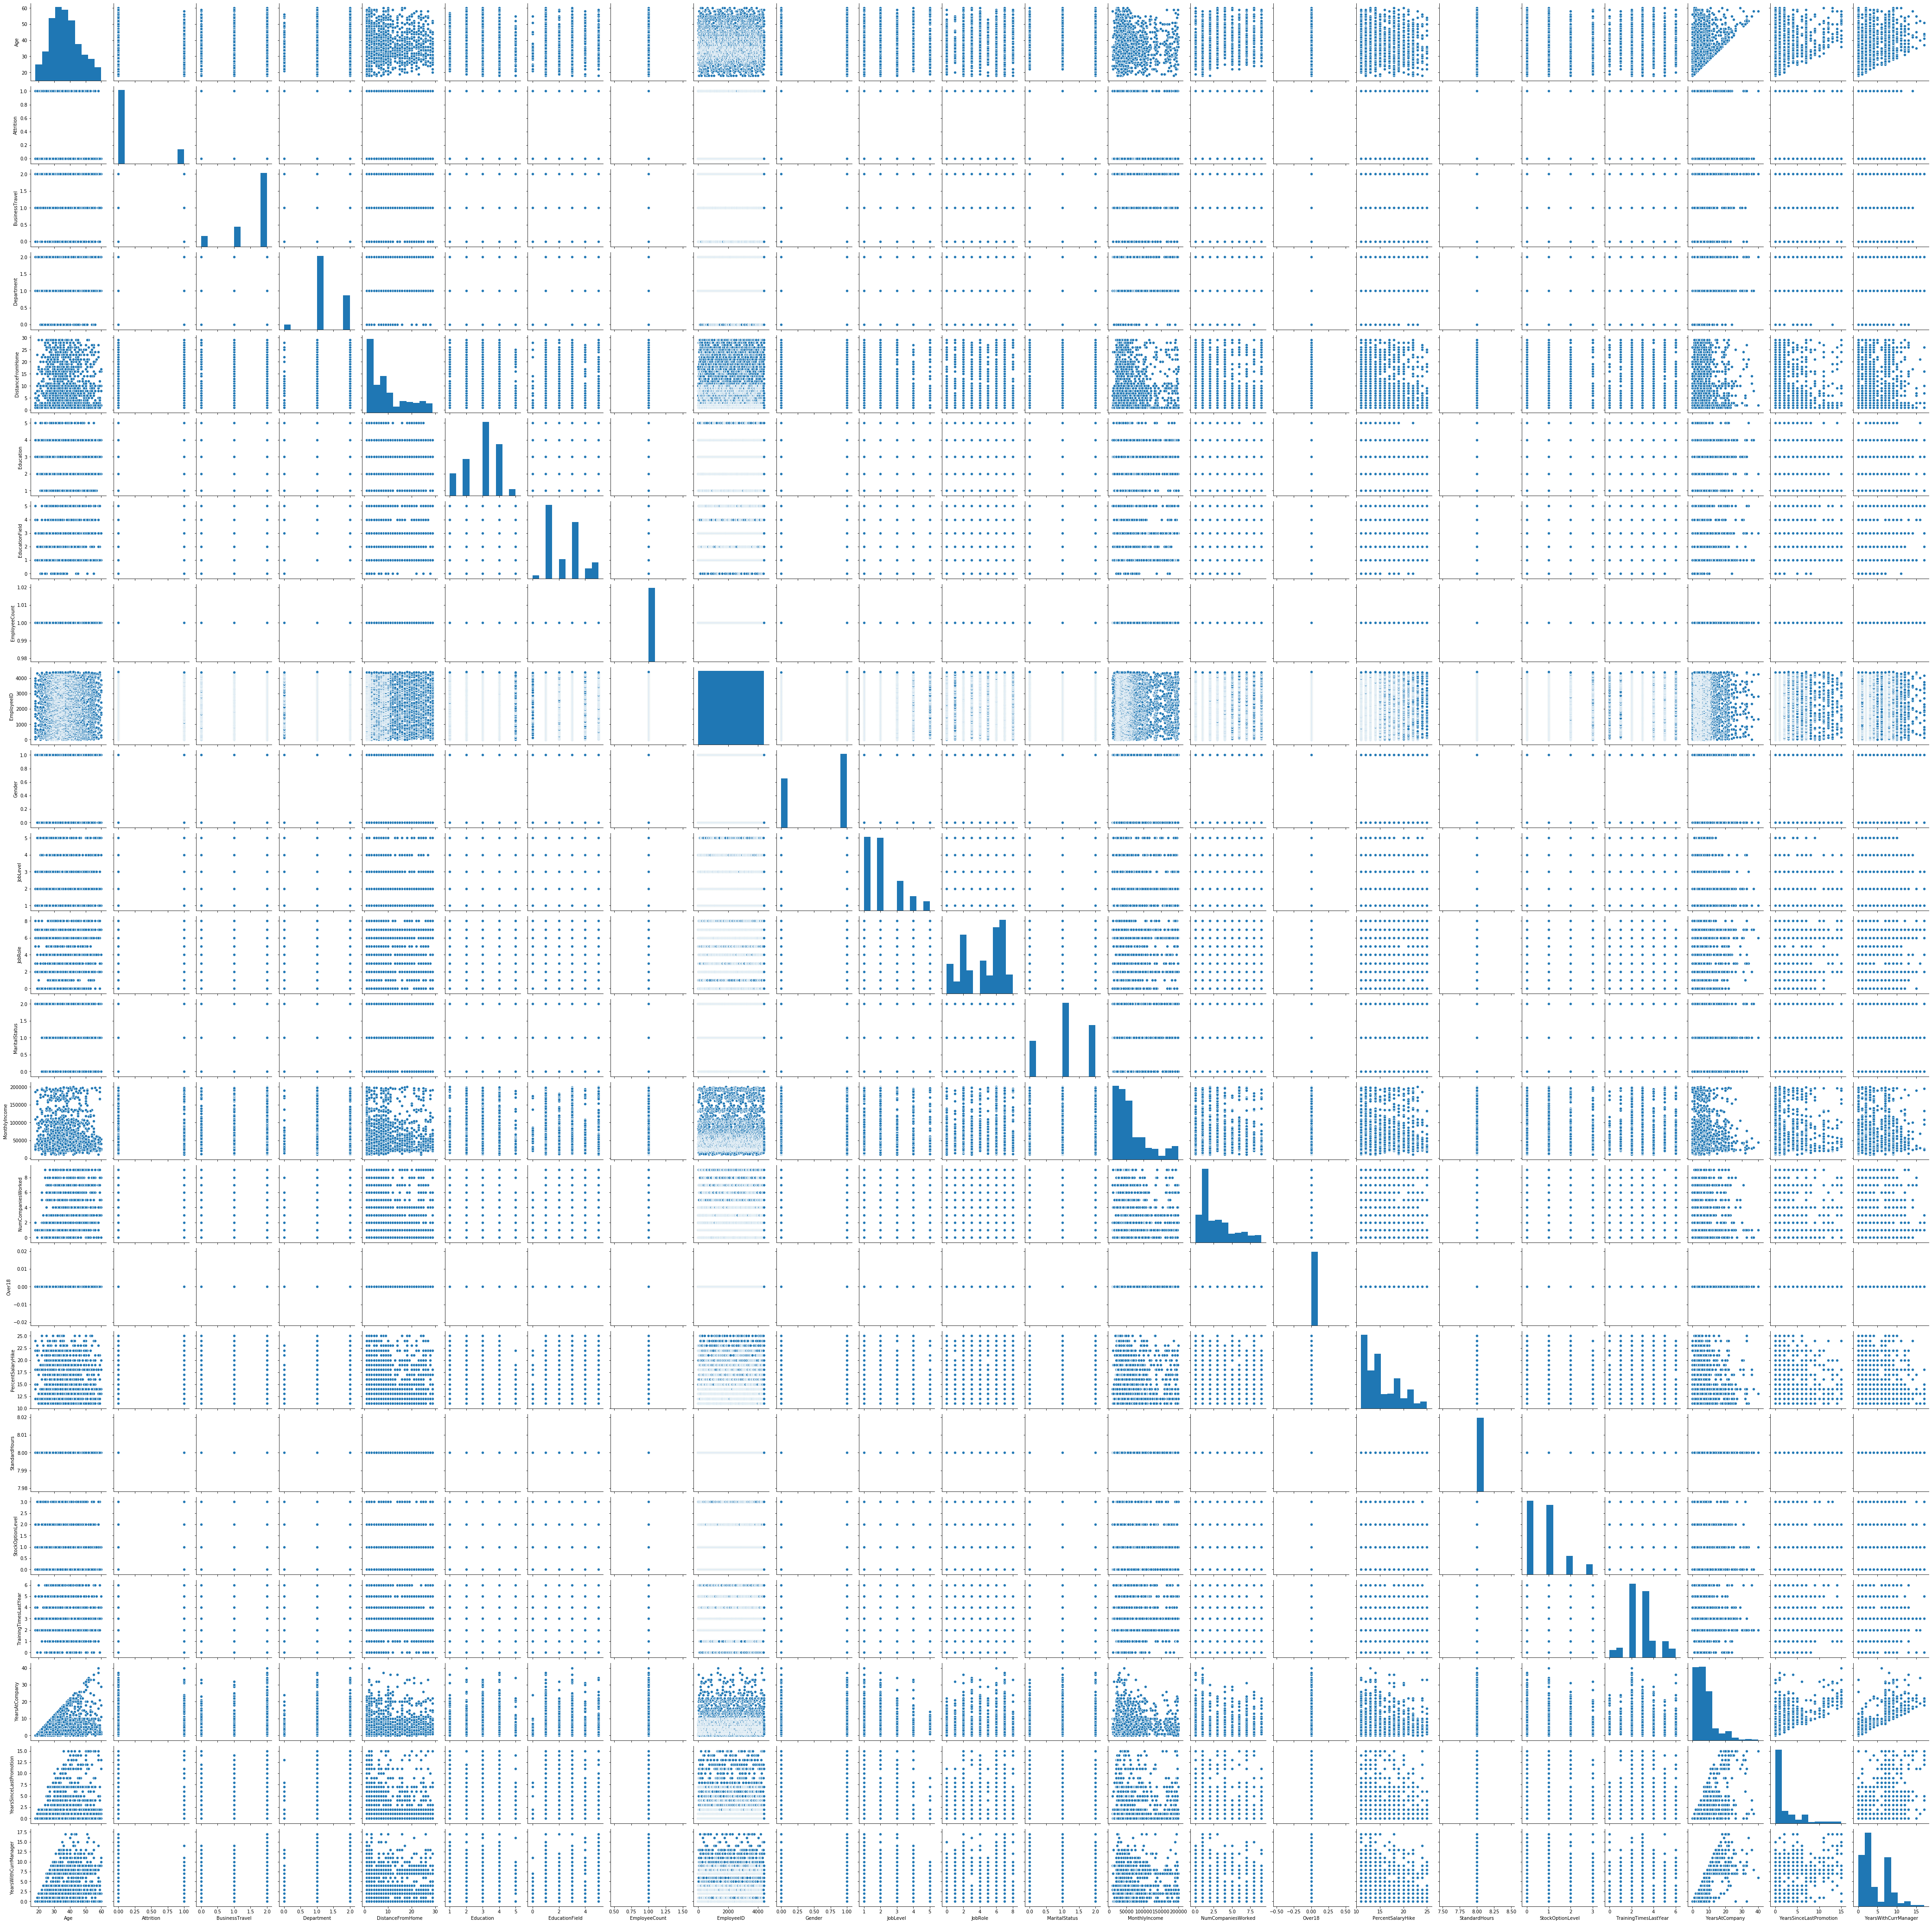

In [4]:
sns.pairplot(data1)

In [32]:
data["MonthlyIncome"].mean()

65029.31292517007

In [5]:
rf_model=RandomForestClassifier(n_estimators=100,max_features=6,oob_score=True)
features=['Age','BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department']
rf_model.fit(X=data1[features],y=data["Attrition"])
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.11312858379920454
BusinessTravel 0.028035999926905225
Department 0.017964903898259034
DistanceFromHome 0.06988187845217783
Education 0.03880828453470034
EducationField 0.03929548063492259
EmployeeCount 0.0
EmployeeID 0.02689065534395068
Gender 0.014860473820044693
JobLevel 0.03476668200538827
JobRole 0.05544174676277991
MaritalStatus 0.04121507646460253
MonthlyIncome 0.11482047826003317
NumCompaniesWorked 0.06571021744213919
Over18 0.0
PercentSalaryHike 0.06758183769140724
StandardHours 0.0
StockOptionLevel 0.034236968835844366
TrainingTimesLastYear 0.042858435465662446
YearsAtCompany 0.08030841262615131
YearsSinceLastPromotion 0.04233070581552556
YearsWithCurrManager 0.05320695051853629
Department 0.018656227701764668


In [6]:
features=["Age","MonthlyIncome","YearsAtCompany"]

In [7]:
X=data1[features]
y=data1["Attrition"]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)

<div class="burk">
#important features here are
**1.AGE**
**2.MonthlyIncome**
**3.Yearsatcompany**
</div><i class="fa fa-lightbulb-o "></i>

In [8]:
model=tree.DecisionTreeClassifier(max_depth=6)
model.fit(xtrain,ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
with open("Attrition.dot","w") as f:
    f=tree.export_graphviz(model,feature_names=["Age","MonthlyIncome","YearsAtCompany"],out_file=f);
model.score(X=pd.DataFrame(data1[["Age","MonthlyIncome","YearsAtCompany"]]),y=data1["Attrition"])


0.8687074829931973

In [10]:
ypred=model.predict(xtest)

0.9997732426303855

# predict un seen

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
r2=r2_score(ypred,ytest)
r2

-1.3039524702939338

In [34]:
unseen=model.predict(np.array([[25,65029,3]]))
unseen

array([0])